In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mouse_viral_study.csv')

df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

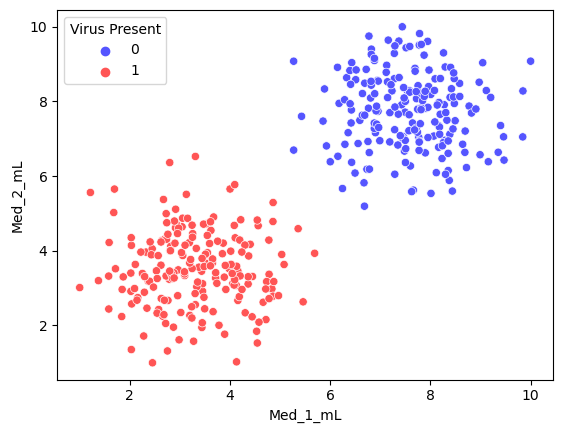

In [4]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df,palette='seismic')

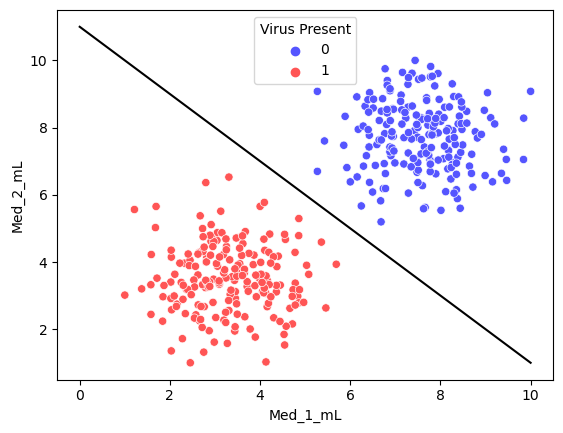

In [5]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df,palette='seismic')

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

In [6]:
from sklearn.svm import SVC

In [7]:
y=df['Virus Present']
X=df.drop('Virus Present',axis=1)

In [8]:
model = SVC(kernel='linear', C=1000)
model.fit(X,y)

SVC(C=1000, kernel='linear')

C:\Users\Ebo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


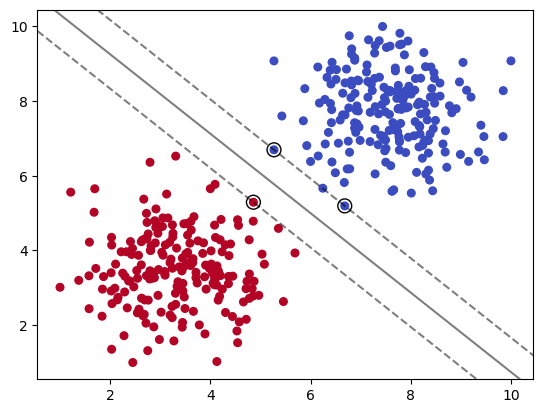

In [9]:
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='coolwarm')
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    
    YY, XX = np.meshgrid(yy,xx)
    xy = np.vstack([XX.ravel(),YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    ax.contour(XX,YY,Z,colors='k', levels=[-1,0,1], alpha=0.5,
               linestyles=['--','-','--'])
    
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:,1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    plt.show()
    
plot_svm_boundary(model,X,y)

C:\Users\Ebo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


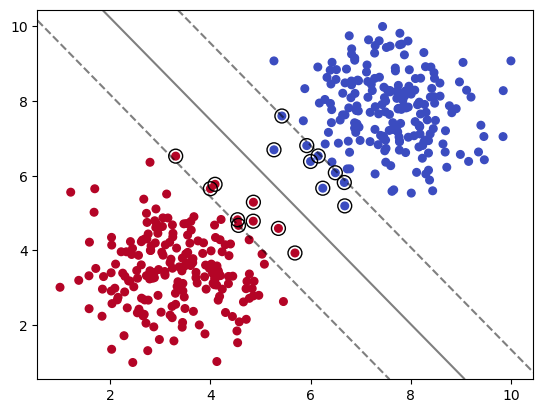

In [10]:
model = SVC(kernel='linear', C=0.05)
model.fit(X,y)

plot_svm_boundary(model,X,y)

C:\Users\Ebo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


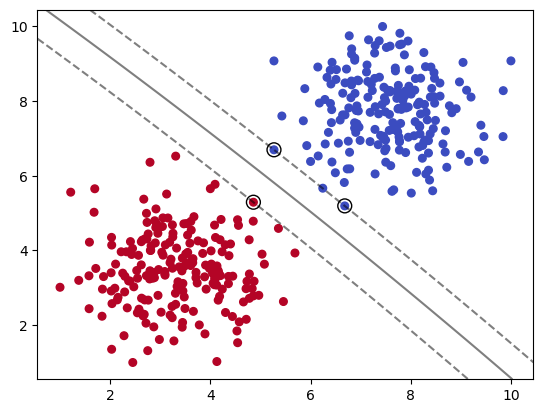

In [11]:
model = SVC(kernel='poly', C=1, degree=2)
model.fit(X,y)

plot_svm_boundary(model,X,y)

C:\Users\Ebo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


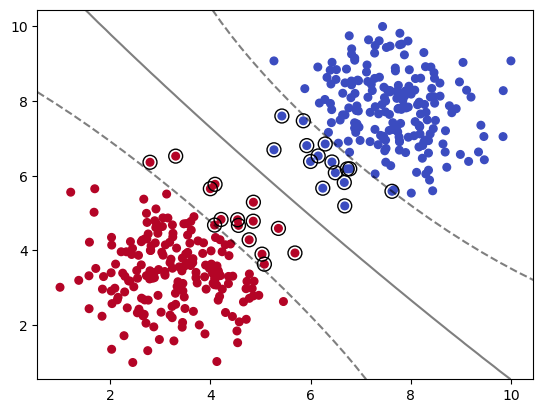

In [12]:
model = SVC(kernel='rbf', C=1, gamma=0.01)
model.fit(X,y)

plot_svm_boundary(model,X,y)

In [13]:
from sklearn.model_selection import GridSearchCV

svm = SVC()
param_grid = {'C':[0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svm,param_grid)

In [14]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [15]:
grid.best_score_

1.0

In [16]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}